In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

#astropy imports
from astropy.io import fits
from astropy import coordinates, time
from astropy import units as u

In [2]:
imagefile = os.path.join(os.getcwd(), 'object.fits')
image = fits.open(imagefile)[0].data
header = fits.open(imagefile)[0].header

In [3]:
mjd = header['MJD-OBS']
print(mjd)

56365.29978605324


In [4]:
radec = coordinates.SkyCoord(header['RA'], header['DEC'], unit=(u.hourangle, u.deg))
location = coordinates.EarthLocation(lon=header['LONGITUD'], lat=header['LATITUDE'])
t = time.Time(mjd, format='mjd')
frame_altaz = coordinates.AltAz(obstime=t, location=location)

In [5]:
#find local sidereal time
lst = t.sidereal_time('apparent', header['LONGITUD'])
print("calculated LST: ", lst)
print("LST from header:", header['LST'])

calculated LST:  13h56m46.0333s
LST from header: 13:56:45.76


In [6]:
coord_altaz = radec.transform_to(frame_altaz)
altitude = coord_altaz.alt
print("calculated altitude: ", altitude)
print("altitude from header:", header['ALTITUDE'], "degrees")

calculated altitude:  74d07m30.3821s
altitude from header: 74.1248588 degrees


In [7]:
#calculate altitude 1 hour earlier
t_1hr = time.Time(mjd-1/24, format='mjd')
frame_altaz_1hr = coordinates.AltAz(obstime=t_1hr, location=location)
coord_altaz_1hr = radec.transform_to(frame_altaz_1hr)
altitude_1hr = coord_altaz_1hr.alt
print("altitude 1 hour earlier: ", altitude_1hr)

altitude 1 hour earlier:  66d15m07.3426s


In [8]:
#calculate altitude 2 hours later
t_2hr = time.Time(mjd+1/12, format='mjd')
frame_altaz_2hr = coordinates.AltAz(obstime=t_2hr, location=location)
coord_altaz_2hr = radec.transform_to(frame_altaz_2hr)
altitude_2hr = coord_altaz_2hr.alt
print("altitude 2 hours later: ", altitude_2hr)

altitude 2 hours later:  68d16m59.7276s


In [9]:
#find time of zenith (by guess and check)
#result is accurate to within 15 minutes
t_zenith = time.Time(mjd+2/96, format='mjd')
frame_altaz_zenith = coordinates.AltAz(obstime=t_zenith, location=location)
coord_altaz_zenith = radec.transform_to(frame_altaz_zenith)
altitude_zenith = coord_altaz_zenith.alt
print("altitude at zenith: ", altitude_zenith)

lst_zenith = t_zenith.sidereal_time('apparent', header['LONGITUD'])
print("time of zenith (MJD): ", t_zenith)
print("(30 minutes after observation)")
print("LST (+/- 15 min): ", lst_zenith)

altitude at zenith:  75d49m01.9912s
time of zenith (MJD):  56365.32061938658
(30 minutes after observation)
LST (+/- 15 min):  14h26m50.9614s


In [10]:
#find time of 40 degree altitude
#again, by guess and check, nearest 15 min
t_40 = time.Time(mjd+19/96, format='mjd')
frame_altaz_40 = coordinates.AltAz(obstime=t_40, location=location)
coord_altaz_40 = radec.transform_to(frame_altaz_40)
altitude_40 = coord_altaz_40.alt

print("4 hr 45 min after zenith")
print("time (MJD): ", t_40)
print("altitude at this time: ", altitude_40)

4 hr 45 min after zenith
time (MJD):  56365.497702719906
altitude at this time:  39d42m23.4744s


In [11]:
times = np.arange(-8/24, 9/24, 1/96)
altitudes = []
for t_offset in times:
    t_loop = time.Time(mjd+t_offset, format='mjd')
    frame_altaz_loop = coordinates.AltAz(obstime=t_loop, location=location)
    coord_altaz_loop = radec.transform_to(frame_altaz_loop)
    altitudes.append(coord_altaz_loop.alt.deg)

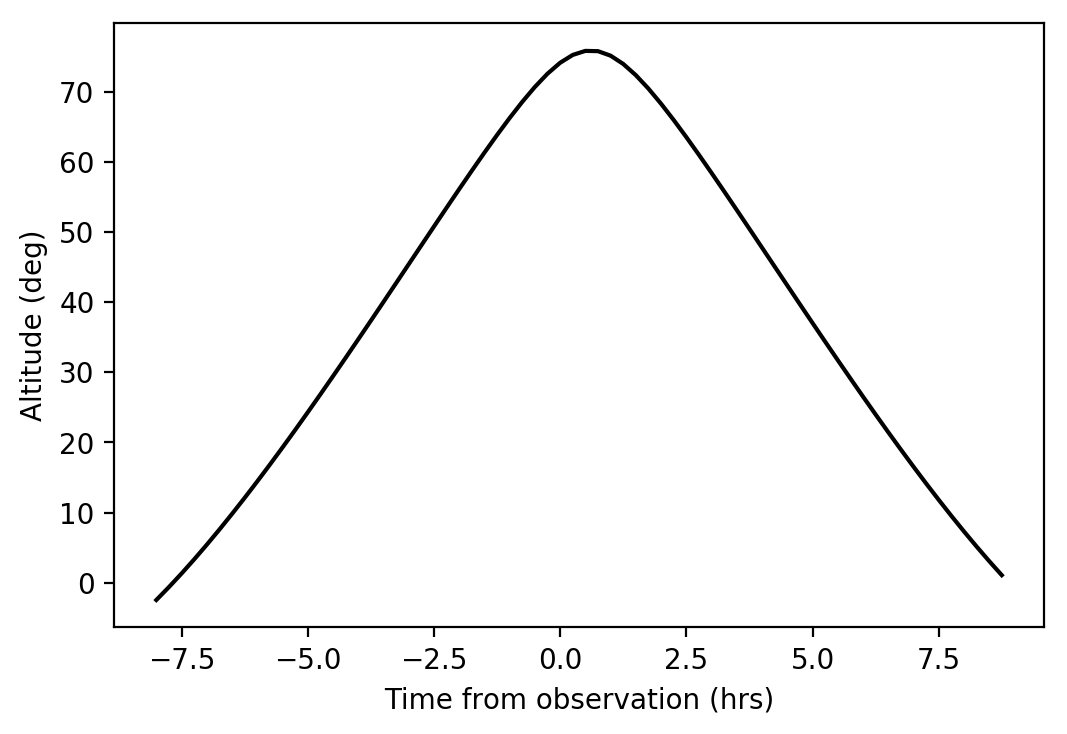

In [12]:
plt.figure(dpi=200)
plt.plot(times*24., altitudes, 'k')
plt.xlabel('Time from observation (hrs)')
plt.ylabel('Altitude (deg)')
plt.show()